# importation de mes donneées d'analyse

In [250]:
import kaggle
import subprocess
import zipfile
import pandas as pd
import pandas as pd
import numpy as np

# Télécharger le dataset depuis Kaggle
subprocess.run(["kaggle", "datasets", "download", "-d", "retailrocket/ecommerce-dataset"])

# Décompresser le fichier zip téléchargé
with zipfile.ZipFile('ecommerce-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('../data')

# Charger les fichiers CSV dans des DataFrames Pandas
category_tree = pd.read_csv('../data/category_tree.csv')
events = pd.read_csv('../data/events.csv')
item_properties_part1 = pd.read_csv('../data/item_properties_part1.csv')
item_properties_part2 = pd.read_csv('../data/item_properties_part2.csv')

# Afficher les premières lignes de chaque DataFrame pour inspection
print("Category Tree:")
print(category_tree.head())

print("\n Events:")
print(events.head())

print("\n Item Properties Part 1:")
print(item_properties_part1.head())

print("\n Item Properties Part 2:")
print(item_properties_part2.head())

Category Tree:
   categoryid  parentid
0        1016     213.0
1         809     169.0
2         570       9.0
3        1691     885.0
4         536    1691.0

 Events:
       timestamp  visitorid event  itemid  transactionid
0  1433221332117     257597  view  355908            NaN
1  1433224214164     992329  view  248676            NaN
2  1433221999827     111016  view  318965            NaN
3  1433221955914     483717  view  253185            NaN
4  1433221337106     951259  view  367447            NaN

 Item Properties Part 1:
       timestamp  itemid    property                            value
0  1435460400000  460429  categoryid                             1338
1  1441508400000  206783         888          1116713 960601 n277.200
2  1439089200000  395014         400  n552.000 639502 n720.000 424566
3  1431226800000   59481         790                       n15360.000
4  1431831600000  156781         917                           828513

 Item Properties Part 2:
       timestamp 

# I. Nettoyage des données pour faciliter mes analyses

# 1. fusionner des datas identiques

In [251]:

item_properties = pd.concat([item_properties_part1, item_properties_part2] ,ignore_index='True')
copie_items_properties =item_properties.copy()

print(f" nouvelle table des proprites : \n{copie_items_properties}")

 nouvelle table des proprites : 
              timestamp  itemid    property                             value
0         1435460400000  460429  categoryid                              1338
1         1441508400000  206783         888           1116713 960601 n277.200
2         1439089200000  395014         400   n552.000 639502 n720.000 424566
3         1431226800000   59481         790                        n15360.000
4         1431831600000  156781         917                            828513
...                 ...     ...         ...                               ...
20275897  1433646000000  236931         929                           n12.000
20275898  1440903600000  455746           6                     150169 639134
20275899  1439694000000  347565         686                            610834
20275900  1433646000000  287231         867                            769062
20275901  1442113200000  275768         888  888666 n10800.000 746840 1318567

[20275902 rows x 4 columns]


# 2. Vérifier les valeurs manquantes

In [252]:

events=events.drop_duplicates()
copie_items_properties = copie_items_properties.drop_duplicates()
icategory_tree = category_tree.drop_duplicates()

print(f" valeurs manquantes pour la table item_properties : \n{copie_items_properties.isnull().sum()}\n\n")
print(f" valeurs manquantes pour la table events : \n{events.isnull().sum()}\n\n")
print(f" valeurs manquantes pour la table categorie : \n{category_tree.isnull().sum()}\n\n")

 valeurs manquantes pour la table item_properties : 
timestamp    0
itemid       0
property     0
value        0
dtype: int64


 valeurs manquantes pour la table events : 
timestamp              0
visitorid              0
event                  0
itemid                 0
transactionid    2733184
dtype: int64


 valeurs manquantes pour la table categorie : 
categoryid     0
parentid      25
dtype: int64




# Analyse des valeurs manquantes :
# Table item_properties_part1 et item_properties_part2 : Aucune valeur manquante, données complètes.
# Table events : transactionid manquant pour 2733184 lignes, indiquant des événements sans transaction (ex: vues, ajouts au # panier). ⚠️ Risque d’analyse incomplète si ces absences ne sont pas prises en compte.
# Table categorie : parentid manquant pour 25 catégories, probablement des catégories racines. ⚠️ Peut impacter l’analyse des # hiérarchies.

.................................................................................................................................
.................................................................................................................................
.................................................................................................................................
.................................................................................................................................
.................................................................................................................................
.................................................................................................................................
# II. analyse sur la table Events
.................................................................................................................................
.................................................................................................................................
.................................................................................................................................
.................................................................................................................................
.................................................................................................................................
.................................................................................................................................

# 1. observation sur la table

In [253]:
print(f"tête de la table : \n \n{events.head()}")

tête de la table : 
 
       timestamp  visitorid event  itemid  transactionid
0  1433221332117     257597  view  355908            NaN
1  1433224214164     992329  view  248676            NaN
2  1433221999827     111016  view  318965            NaN
3  1433221955914     483717  view  253185            NaN
4  1433221337106     951259  view  367447            NaN


# On filtre les événements pour ne conserver que ceux dont l’itemid existe aussi dans copie_items_properties 
(évite d'analyser des articles sans propriété associée).


In [254]:
events = events[events.itemid.isin(copie_items_properties.itemid.unique())]



# observation plus en details sur les valeurs de transactionid

In [255]:
value_transactionid = events.groupby('transactionid').size()
print(f"different valeurs de transactionid : \n \n{value_transactionid}")

different valeurs de transactionid : 
 
transactionid
0.0        1
1.0        1
2.0        1
3.0        1
4.0        1
          ..
17667.0    1
17668.0    1
17669.0    2
17670.0    1
17671.0    1
Length: 17313, dtype: int64


In [256]:
# Verifions a nouveau les valeurs manquants  

nb_valeurs_manquantes = events['transactionid'].isna().sum()

print(f"Nombre total de valeurs manquantes dans transactionid : {nb_valeurs_manquantes}")


# Filtrer et afficher uniquement les lignes où transactionid est NaN
value_transactionid = events[events['transactionid'].isna()]

print(f"Valeurs avec transactionid manquant :\n\n{value_transactionid}")

Nombre total de valeurs manquantes dans transactionid : 2478083
Valeurs avec transactionid manquant :

             timestamp  visitorid event  itemid  transactionid
0        1433221332117     257597  view  355908            NaN
1        1433224214164     992329  view  248676            NaN
3        1433221955914     483717  view  253185            NaN
4        1433221337106     951259  view  367447            NaN
5        1433224086234     972639  view   22556            NaN
...                ...        ...   ...     ...            ...
2756096  1438398785939     591435  view  261427            NaN
2756097  1438399813142     762376  view  115946            NaN
2756098  1438397820527    1251746  view   78144            NaN
2756099  1438398530703    1184451  view  283392            NaN
2756100  1438400163914     199536  view  152913            NaN

[2478083 rows x 5 columns]


# partir de cette analyse nous remarquons que les valeurs manquantes on diminue dur au trie des events qui on une association avec les item_properties, nous pouvons conclure que les transactionid avec des valeurs NaN correspondent aux consultations de produits qui n'ont pas été achetés par les visiteurs.

# 2. amelioration ou conversion de timestamp en format date

In [257]:
events["timestamp"]= pd.to_datetime(events["timestamp"], unit="ms")

# occurence des valeurs de event 

In [288]:

event_attributes = events.groupby("event").size()
print(f"size_event : \n \n{event_attributes}")

event_attributes.to_csv("../data/event_attributes.csv",index=True)
print("📁 Le fichier 'event_attributess.csv' a été créé avec succès !")



size_event : 
 
event
addtocart        68133
transaction      21982
view           2409950
dtype: int64
📁 Le fichier 'event_attributess.csv' a été créé avec succès !


C:\Users\user\AppData\Local\Temp\ipykernel_18688\1693132528.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=event_attributes.index, y=event_attributes.values, palette="viridis")


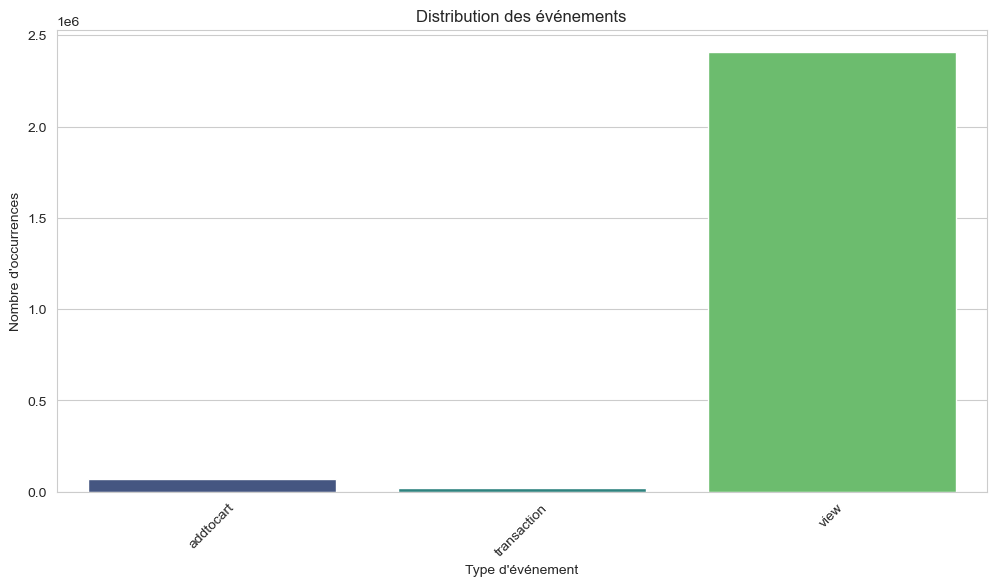

In [259]:
import matplotlib.pyplot as plt
import seaborn as sns

# Création du graphique
plt.figure(figsize=(12, 6))
sns.barplot(x=event_attributes.index, y=event_attributes.values, palette="viridis")

# Ajout des titres et labels
plt.xlabel("Type d'événement")
plt.ylabel("Nombre d'occurrences")
plt.title("Distribution des événements")
plt.xticks(rotation=45)  # Rotation des labels pour une meilleure lisibilité

# Affichage du graphique
plt.show()


# Le graphique représente la distribution des événements liés à l'interaction des utilisateurs avec les produits. Les événements sont catégorisés en trois types :

# View (Consultation du produit) – Le plus fréquent, avec un volume extrêmement élevé.
# Add to cart (Ajout au panier) – Beaucoup moins fréquent que les consultations.
# Transaction (Achat finalisé) – Le moins fréquent des trois.

# 3. selectionne des valeurs unique d'event 

In [260]:
event_view = events[events["event"]=="view"]
event_addtocart = events[events["event"]=="addtocart"]
event_transaction = events[events["event"]=="transaction"]
print(f"selection_event view: \n\n{event_view}")
print(f"selection_event addtocart: \n\n{event_addtocart}")
print(f"selection_event transaction: \n\n{event_transaction}")

selection_event view: 

                      timestamp  visitorid event  itemid  transactionid
0       2015-06-02 05:02:12.117     257597  view  355908            NaN
1       2015-06-02 05:50:14.164     992329  view  248676            NaN
3       2015-06-02 05:12:35.914     483717  view  253185            NaN
4       2015-06-02 05:02:17.106     951259  view  367447            NaN
5       2015-06-02 05:48:06.234     972639  view   22556            NaN
...                         ...        ...   ...     ...            ...
2756096 2015-08-01 03:13:05.939     591435  view  261427            NaN
2756097 2015-08-01 03:30:13.142     762376  view  115946            NaN
2756098 2015-08-01 02:57:00.527    1251746  view   78144            NaN
2756099 2015-08-01 03:08:50.703    1184451  view  283392            NaN
2756100 2015-08-01 03:36:03.914     199536  view  152913            NaN

[2409950 rows x 5 columns]
selection_event addtocart: 

                      timestamp  visitorid      event  

# 4. Analyse des événements pour comprendre le comportement utilisateur et calculer le taux de conversion


# a. Identifier les utilisateurs ayant ajouté un produit au panier

In [286]:
user_addtocart = event_addtocart["visitorid"].nunique()
print(f"utilisateurs qui ont ajoute un produit au panier: \n\n{user_addtocart}")

utilisateurs qui ont ajoute un produit au panier: 

37387


# b. Identifier les utilisateurs ayant vue des produits sans ajouté  au panier

In [262]:
user_view_only = event_view[~event_view['visitorid'].isin(user_addtocart)]['visitorid'].unique()
print(f"Utilisateurs ayant vu des produits sans ajouter au panier : \n\n{user_view_only}")



Utilisateurs ayant vu des produits sans ajouter au panier : 

[ 257597  992329  483717 ...  591435  762376 1184451]


# 3 Calculer le taux de conversion pour les deux groupes

In [263]:
conv_addtocart = event_transaction[event_transaction["visitorid"].isin(user_addtocart)]["visitorid"].nunique()/len(user_addtocart)

conv_view_only = event_transaction[event_transaction["visitorid"].isin(user_view_only)]["visitorid"].nunique()/len(user_view_only)
# Affichage des résultats
print(f"Taux de conversion des utilisateurs ayant ajouté un produit au panier : {conv_addtocart:.2%}")
print(f"Taux de conversion des utilisateurs ayant seulement vu des produits : {conv_view_only:.2%}")

Taux de conversion des utilisateurs ayant ajouté un produit au panier : 27.96%
Taux de conversion des utilisateurs ayant seulement vu des produits : 0.09%


# ✅ Les utilisateurs qui ajoutent un produit au panier ont un taux de conversion beaucoup plus élevé (27.96%) que ceux qui se contentent de voir les produits (0.09%).

In [264]:
"""3️⃣ Conclusion générale
L'ajout au panier est un levier clé pour améliorer 
les conversions. Il est donc essentiel d'optimiser cette étape et de trouver des moyens 
d'inciter plus d'utilisateurs à franchir le 
cap entre la simple consultation et l'achat.

💡 Action recommandée : Mettre en place des
 stratégies pour transformer plus de visiteurs 
 en acheteurs en optimisant le tunnel de conversion (ex : notifications, offres limitées, simplification du checkout)."""

"3️⃣ Conclusion générale\nL'ajout au panier est un levier clé pour améliorer \nles conversions. Il est donc essentiel d'optimiser cette étape et de trouver des moyens \nd'inciter plus d'utilisateurs à franchir le \ncap entre la simple consultation et l'achat.\n\n💡 Action recommandée : Mettre en place des\n stratégies pour transformer plus de visiteurs \n en acheteurs en optimisant le tunnel de conversion (ex : notifications, offres limitées, simplification du checkout)."

C:\Users\user\AppData\Local\Temp\ipykernel_18688\2783825821.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


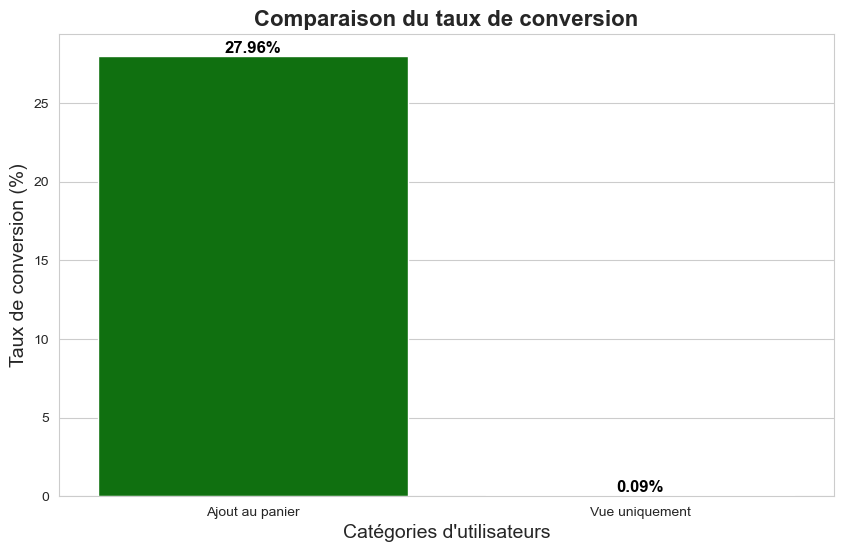

In [285]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Style Seaborn
sns.set_style("whitegrid")

# Données sous forme de DataFrame
data = pd.DataFrame({
    "Catégories d'utilisateurs": ['Ajout au panier', 'Vue uniquement'],
    "Taux de conversion (%)": [conv_addtocart * 100, conv_view_only * 100]  # Convertir en %
})

# Création de la figure
plt.figure(figsize=(10, 6))

# Tracer le graphique à barres avec Seaborn
ax = sns.barplot(
    data=data, 
    x="Catégories d'utilisateurs", 
    y="Taux de conversion (%)", 
    palette=["green", "red"]  # Couleurs améliorées
)

# Ajouter les valeurs au-dessus des barres
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}%",  # Formater en pourcentage
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

# Ajouter les labels et le titre
plt.xlabel("Catégories d'utilisateurs", fontsize=14)
plt.ylabel("Taux de conversion (%)", fontsize=14)
plt.title("Comparaison du taux de conversion", fontsize=16, fontweight='bold')

# Affichage du graphique
plt.show()


# TEST A/B

 Hypothèse à tester
Nous avons constaté que :

Les utilisateurs qui ajoutent un produit au panier (conv_addtocart) ont un taux de conversion plus élevé.
Les utilisateurs qui ne font que consulter des produits (conv_view_only) ont un taux de conversion plus faible.

💡 Hypothèse : En améliorant la visibilité et l'accessibilité du bouton "Ajouter au panier", nous pourrions augmenter le taux de conversion global.

.................................................................................................................................
.................................................................................................................................
.................................................................................................................................
.................................................................................................................................
.................................................................................................................................
.................................................................................................................................
# III. analyse sur la table item_properties_part1 et item_properties_part1
.................................................................................................................................
.................................................................................................................................
.................................................................................................................................
.................................................................................................................................
.................................................................................................................................
.................................................................................................................................

In [266]:
#plus haut on a deja fusionner nos datas maintenant reaffichons les
print(f"nouvelle table de properties:\n {copie_items_properties}")

nouvelle table de properties:
               timestamp  itemid    property                             value
0         1435460400000  460429  categoryid                              1338
1         1441508400000  206783         888           1116713 960601 n277.200
2         1439089200000  395014         400   n552.000 639502 n720.000 424566
3         1431226800000   59481         790                        n15360.000
4         1431831600000  156781         917                            828513
...                 ...     ...         ...                               ...
20275897  1433646000000  236931         929                           n12.000
20275898  1440903600000  455746           6                     150169 639134
20275899  1439694000000  347565         686                            610834
20275900  1433646000000  287231         867                            769062
20275901  1442113200000  275768         888  888666 n10800.000 746840 1318567

[20275902 rows x 4 columns]


In [267]:
#convertions de la date en format date lisible

copie_items_properties["timestamp"] =pd.to_datetime(copie_items_properties["timestamp"], unit="ms")

# creons un fichier csv de la table item_properties_part1 et item_properties_part1



In [268]:
copie_items_properties.to_csv("../data/properties.csv",index=True)
print("📁 Le fichier 'properties.csv' a été créé avec succès !")

📁 Le fichier 'properties.csv' a été créé avec succès !


# 2 .nettoyons les donnees en supprimant les doublons sur la table copie_items_properties

In [269]:
# avant la suppression des doublons

print(f"nombre de ligne dans la table copie_items_properties : \n {copie_items_properties.shape}")

copie_items_properties = copie_items_properties.drop_duplicates()

# apres la suppression des doublons

print(f"nombre de ligne dans la table copie_items_properties : \n {copie_items_properties.shape}")


nombre de ligne dans la table copie_items_properties : 
 (20275902, 4)
nombre de ligne dans la table copie_items_properties : 
 (20275902, 4)


Nous remarquons que nos données ne contiennent pas de doublons

# essayons de comprendre pourquoi property de  copie_items_properties a la valeur :"categoryid"

In [270]:
# comptons le nombre d'occurence
value_categoryid = copie_items_properties[copie_items_properties["property"]=="categoryid"]
print(f"nbre d'occurene de la valeur categoryid :\n\n{value_categoryid}")
print(value_categoryid.shape[0])

nbre d'occurene de la valeur categoryid :

                   timestamp  itemid    property value
0        2015-06-28 03:00:00  460429  categoryid  1338
140      2015-05-24 03:00:00  281245  categoryid  1277
151      2015-06-28 03:00:00   35575  categoryid  1059
189      2015-07-19 03:00:00    8313  categoryid  1147
197      2015-07-26 03:00:00   55102  categoryid    47
...                      ...     ...         ...   ...
20275797 2015-06-07 03:00:00  255696  categoryid  1404
20275822 2015-05-10 03:00:00  390760  categoryid   324
20275830 2015-07-26 03:00:00  211844  categoryid   256
20275872 2015-06-28 03:00:00  444741  categoryid   511
20275878 2015-06-28 03:00:00   97513  categoryid  1385

[788214 rows x 4 columns]
788214


# avec la frequence eleve on peut conclure que categoryid n est pas une erreur mais on se pose toujours laquestion de savoir ce que ca represente vraiment

# IV. Analyse sur la table categorie_tree

In [271]:
# Afficher les premières lignes
print(category_tree.head())

# Informations sur le DataFrame
print(category_tree.info())


   categoryid  parentid
0        1016     213.0
1         809     169.0
2         570       9.0
3        1691     885.0
4         536    1691.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1669 entries, 0 to 1668
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   categoryid  1669 non-null   int64  
 1   parentid    1644 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 26.2 KB
None


In [272]:
print(f" valeurs manquantes pour la table categorie : \n{category_tree.isnull().sum()}\n\n")

 valeurs manquantes pour la table categorie : 
categoryid     0
parentid      25
dtype: int64




In [273]:
value_prentid=category_tree.groupby("parentid").size()
print(f" differents valeurs la colonne parentid : \n{value_prentid}\n\n")

value_nan = category_tree[category_tree["parentid"]==8]
print(f" differents valeurs nan : \n{value_nan}\n\n")

 differents valeurs la colonne parentid : 
parentid
8.0        5
9.0        6
14.0       7
19.0       1
20.0       5
          ..
1687.0    17
1691.0     2
1692.0     3
1696.0     3
1698.0     7
Length: 362, dtype: int64


 differents valeurs nan : 
      categoryid  parentid
72           397       8.0
73          1230       8.0
74           681       8.0
1181        1225       8.0
1182          70       8.0




In [274]:
# Compter le nombre de catégories principales (sans parent)
root_categories = category_tree[category_tree['parentid'].isnull()].shape[0]
print(f"Nombre de catégories principales : {root_categories}")

Nombre de catégories principales : 25


In [275]:
# Compter le nombre d'enfants pour chaque catégorie
child_category_tree =category_tree['parentid'].value_counts()
print("Top 5 des catégories avec le plus d'enfants directs :")
print(child_category_tree)

Top 5 des catégories avec le plus d'enfants directs :
parentid
250.0     31
362.0     22
1009.0    22
351.0     19
1259.0    18
          ..
95.0       1
323.0      1
747.0      1
183.0      1
209.0      1
Name: count, Length: 362, dtype: int64


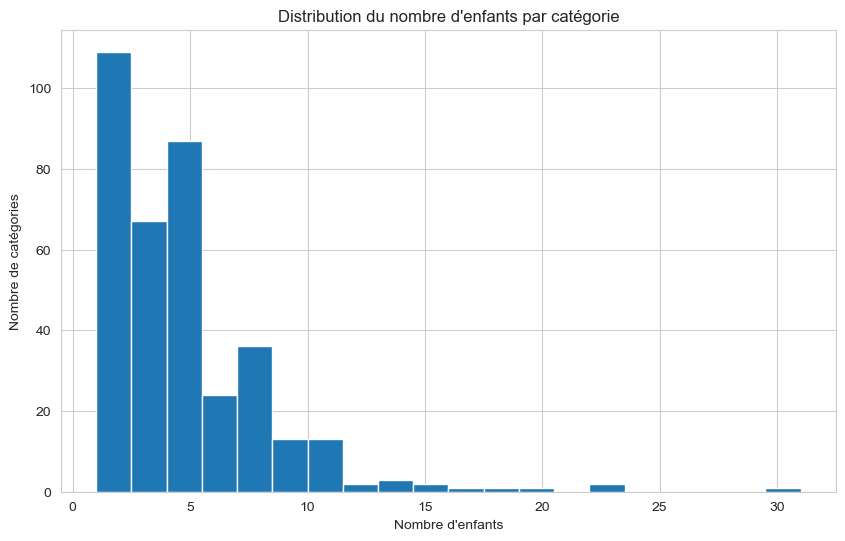

In [276]:


# Distribution du nombre d'enfants par catégorie
plt.figure(figsize=(10, 6))
child_category_tree.hist(bins=20)
plt.title("Distribution du nombre d'enfants par catégorie")
plt.xlabel("Nombre d'enfants")
plt.ylabel("Nombre de catégories")
plt.show()

In [277]:
# Identifier les catégories feuilles (sans enfants)
leaf_categories = set(category_tree['categoryid']) - set(category_tree['parentid'].dropna())
print(f"Nombre de catégories feuilles : {len(leaf_categories)}")

Nombre de catégories feuilles : 1307


# verification des cles de liaisons entre category_tree et copie_items_properties

In [278]:

common_columns = set(category_tree.columns).intersection(set(copie_items_properties.columns))
print(common_columns)

set()


il ne presente pas de cle de liaison

In [279]:

# get only items relevant to events & price + cat properties
copie_items_properties = copie_items_properties[copie_items_properties.property.isin(["categoryid","790"]) & 
    copie_items_properties.itemid.isin(events.itemid.unique())]
# clean-up values & property data types
copie_items_properties.value = copie_items_properties.value.str.replace("n","").astype("float")
copie_items_properties.property = copie_items_properties.property.map({"790":"price",
    "categoryid":"categoryid"})
# similarily, clean up events
events = events[events.itemid.isin(copie_items_properties.itemid.unique())]
# del unused vars

# examine results
display(events.info())
display(copie_items_properties.info())
display(category_tree.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2500065 entries, 0 to 2756100
Data columns (total 5 columns):
 #   Column         Dtype         
---  ------         -----         
 0   timestamp      datetime64[ns]
 1   visitorid      int64         
 2   event          object        
 3   itemid         int64         
 4   transactionid  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 114.4+ MB


None

<class 'pandas.core.frame.DataFrame'>
Index: 1650853 entries, 0 to 20275890
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   timestamp  1650853 non-null  datetime64[ns]
 1   itemid     1650853 non-null  int64         
 2   property   1650853 non-null  object        
 3   value      1650853 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 63.0+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1669 entries, 0 to 1668
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   categoryid  1669 non-null   int64  
 1   parentid    1644 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 26.2 KB


None